In [1]:
# Libraries for numerical computation and visualization
import numpy as np
import matplotlib.pyplot as plt

# Scikit-learn tools for modeling and evaluation
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


In [2]:

# Set seed for reproducibility
np.random.seed(42)

# Generate 100 input values uniformly between -3 and 3
X = np.random.uniform(low=-3, high=3, size=(100, 1))

# Generate outputs using a nonlinear equation with added Gaussian noise
noise = np.random.normal(loc=0, scale=1, size=X.shape)
y = 0.5 * X**3 - X**2 + 2 + noise


In [7]:

# Split the dataset into training and testing sets (70/30)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

print(f"Train set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")


Train set size: 70, Test set size: 30


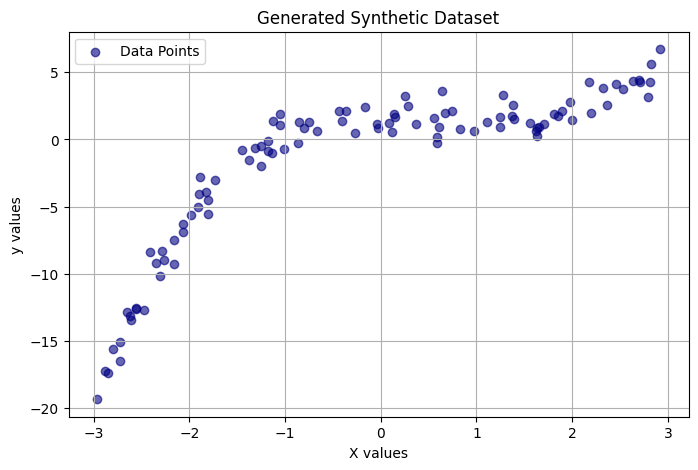

In [4]:

# Plot the raw generated data
plt.figure(figsize=(8, 5))
plt.scatter(X, y, color='navy', alpha=0.6, label='Data Points')
plt.title('Generated Synthetic Dataset')
plt.xlabel('X values')
plt.ylabel('y values')
plt.grid(True)
plt.legend()
plt.show()


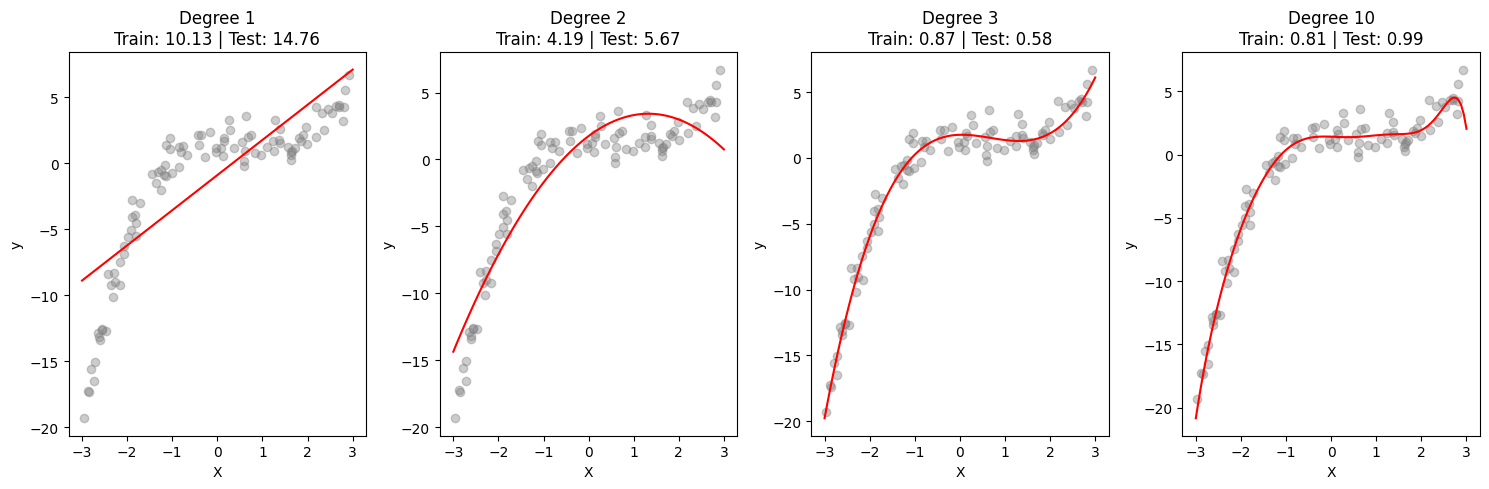

In [5]:

# Try polynomial regression models of increasing complexity
degrees = [1, 2, 3, 10]
plt.figure(figsize=(15, 5))

for idx, degree in enumerate(degrees):
    # Build a pipeline model: polynomial features + linear regression
    model = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linreg', LinearRegression())
    ])
    model.fit(X_train, y_train)

    # Predict on training and test data
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Compute errors
    train_err = mean_squared_error(y_train, y_train_pred)
    test_err = mean_squared_error(y_test, y_test_pred)

    # Plot predictions
    plt.subplot(1, len(degrees), idx + 1)
    plt.scatter(X, y, color='gray', alpha=0.4)
    X_plot = np.linspace(-3, 3, 100).reshape(-1, 1)
    y_plot = model.predict(X_plot)
    plt.plot(X_plot, y_plot, color='red')
    plt.title(f'Degree {degree}\nTrain: {train_err:.2f} | Test: {test_err:.2f}')
    plt.xlabel('X')
    plt.ylabel('y')

plt.tight_layout()
plt.show()


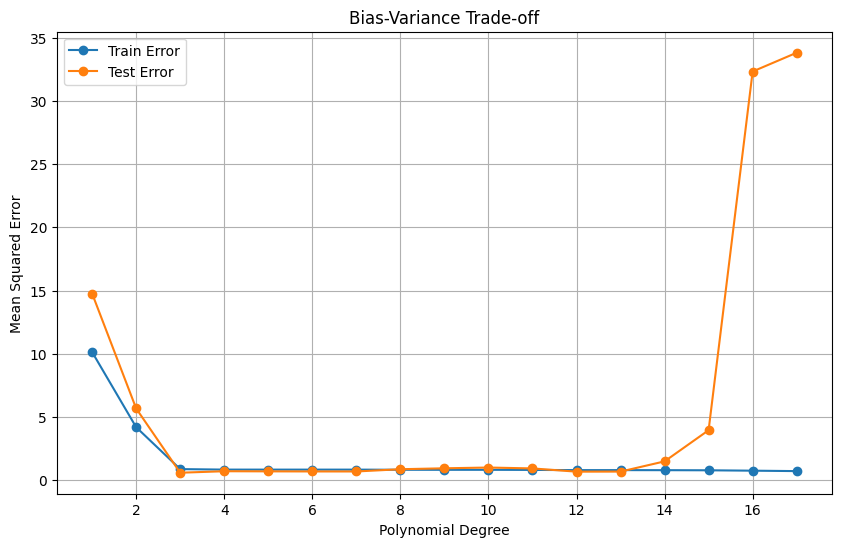

In [6]:

# Measure training and testing error for polynomial models of different degrees
train_errors = []
test_errors = []
degrees = range(1, 18)

for d in degrees:
    model = Pipeline([
        ('poly', PolynomialFeatures(d)),
        ('linreg', LinearRegression())
    ])
    model.fit(X_train, y_train)

    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test)

    train_errors.append(mean_squared_error(y_train, train_pred))
    test_errors.append(mean_squared_error(y_test, test_pred))

# Plot training and testing errors against model complexity
plt.figure(figsize=(10, 6))
plt.plot(degrees, train_errors, label='Train Error', marker='o')
plt.plot(degrees, test_errors, label='Test Error', marker='o')
plt.title('Bias-Variance Trade-off')
plt.xlabel('Polynomial Degree')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.show()
